In [1]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.morphology as morph


## Imágenes oscuras

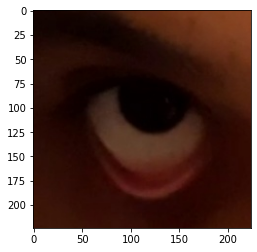

In [2]:
img_1 = cv2.imread("data/img_2_10.jpg", cv2.IMREAD_COLOR)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
#mostrar la imagen
plt.imshow(img_1)

## Imágenes claras

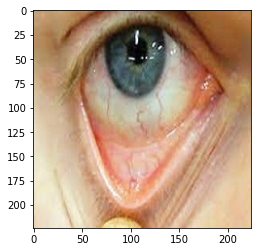

In [3]:
img_1 = cv2.imread("data/img_1_0.jpg", cv2.IMREAD_COLOR)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
#mostrar la imagen
plt.imshow(img_1)

## Imágenes pálidas

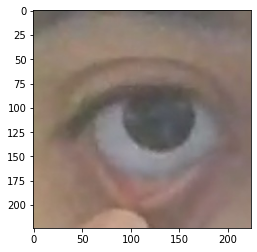

In [4]:
img_1 = cv2.imread("data/img_1_10.jpg", cv2.IMREAD_COLOR)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
#mostrar la imagen
plt.imshow(img_1)

## Comparación de Canales

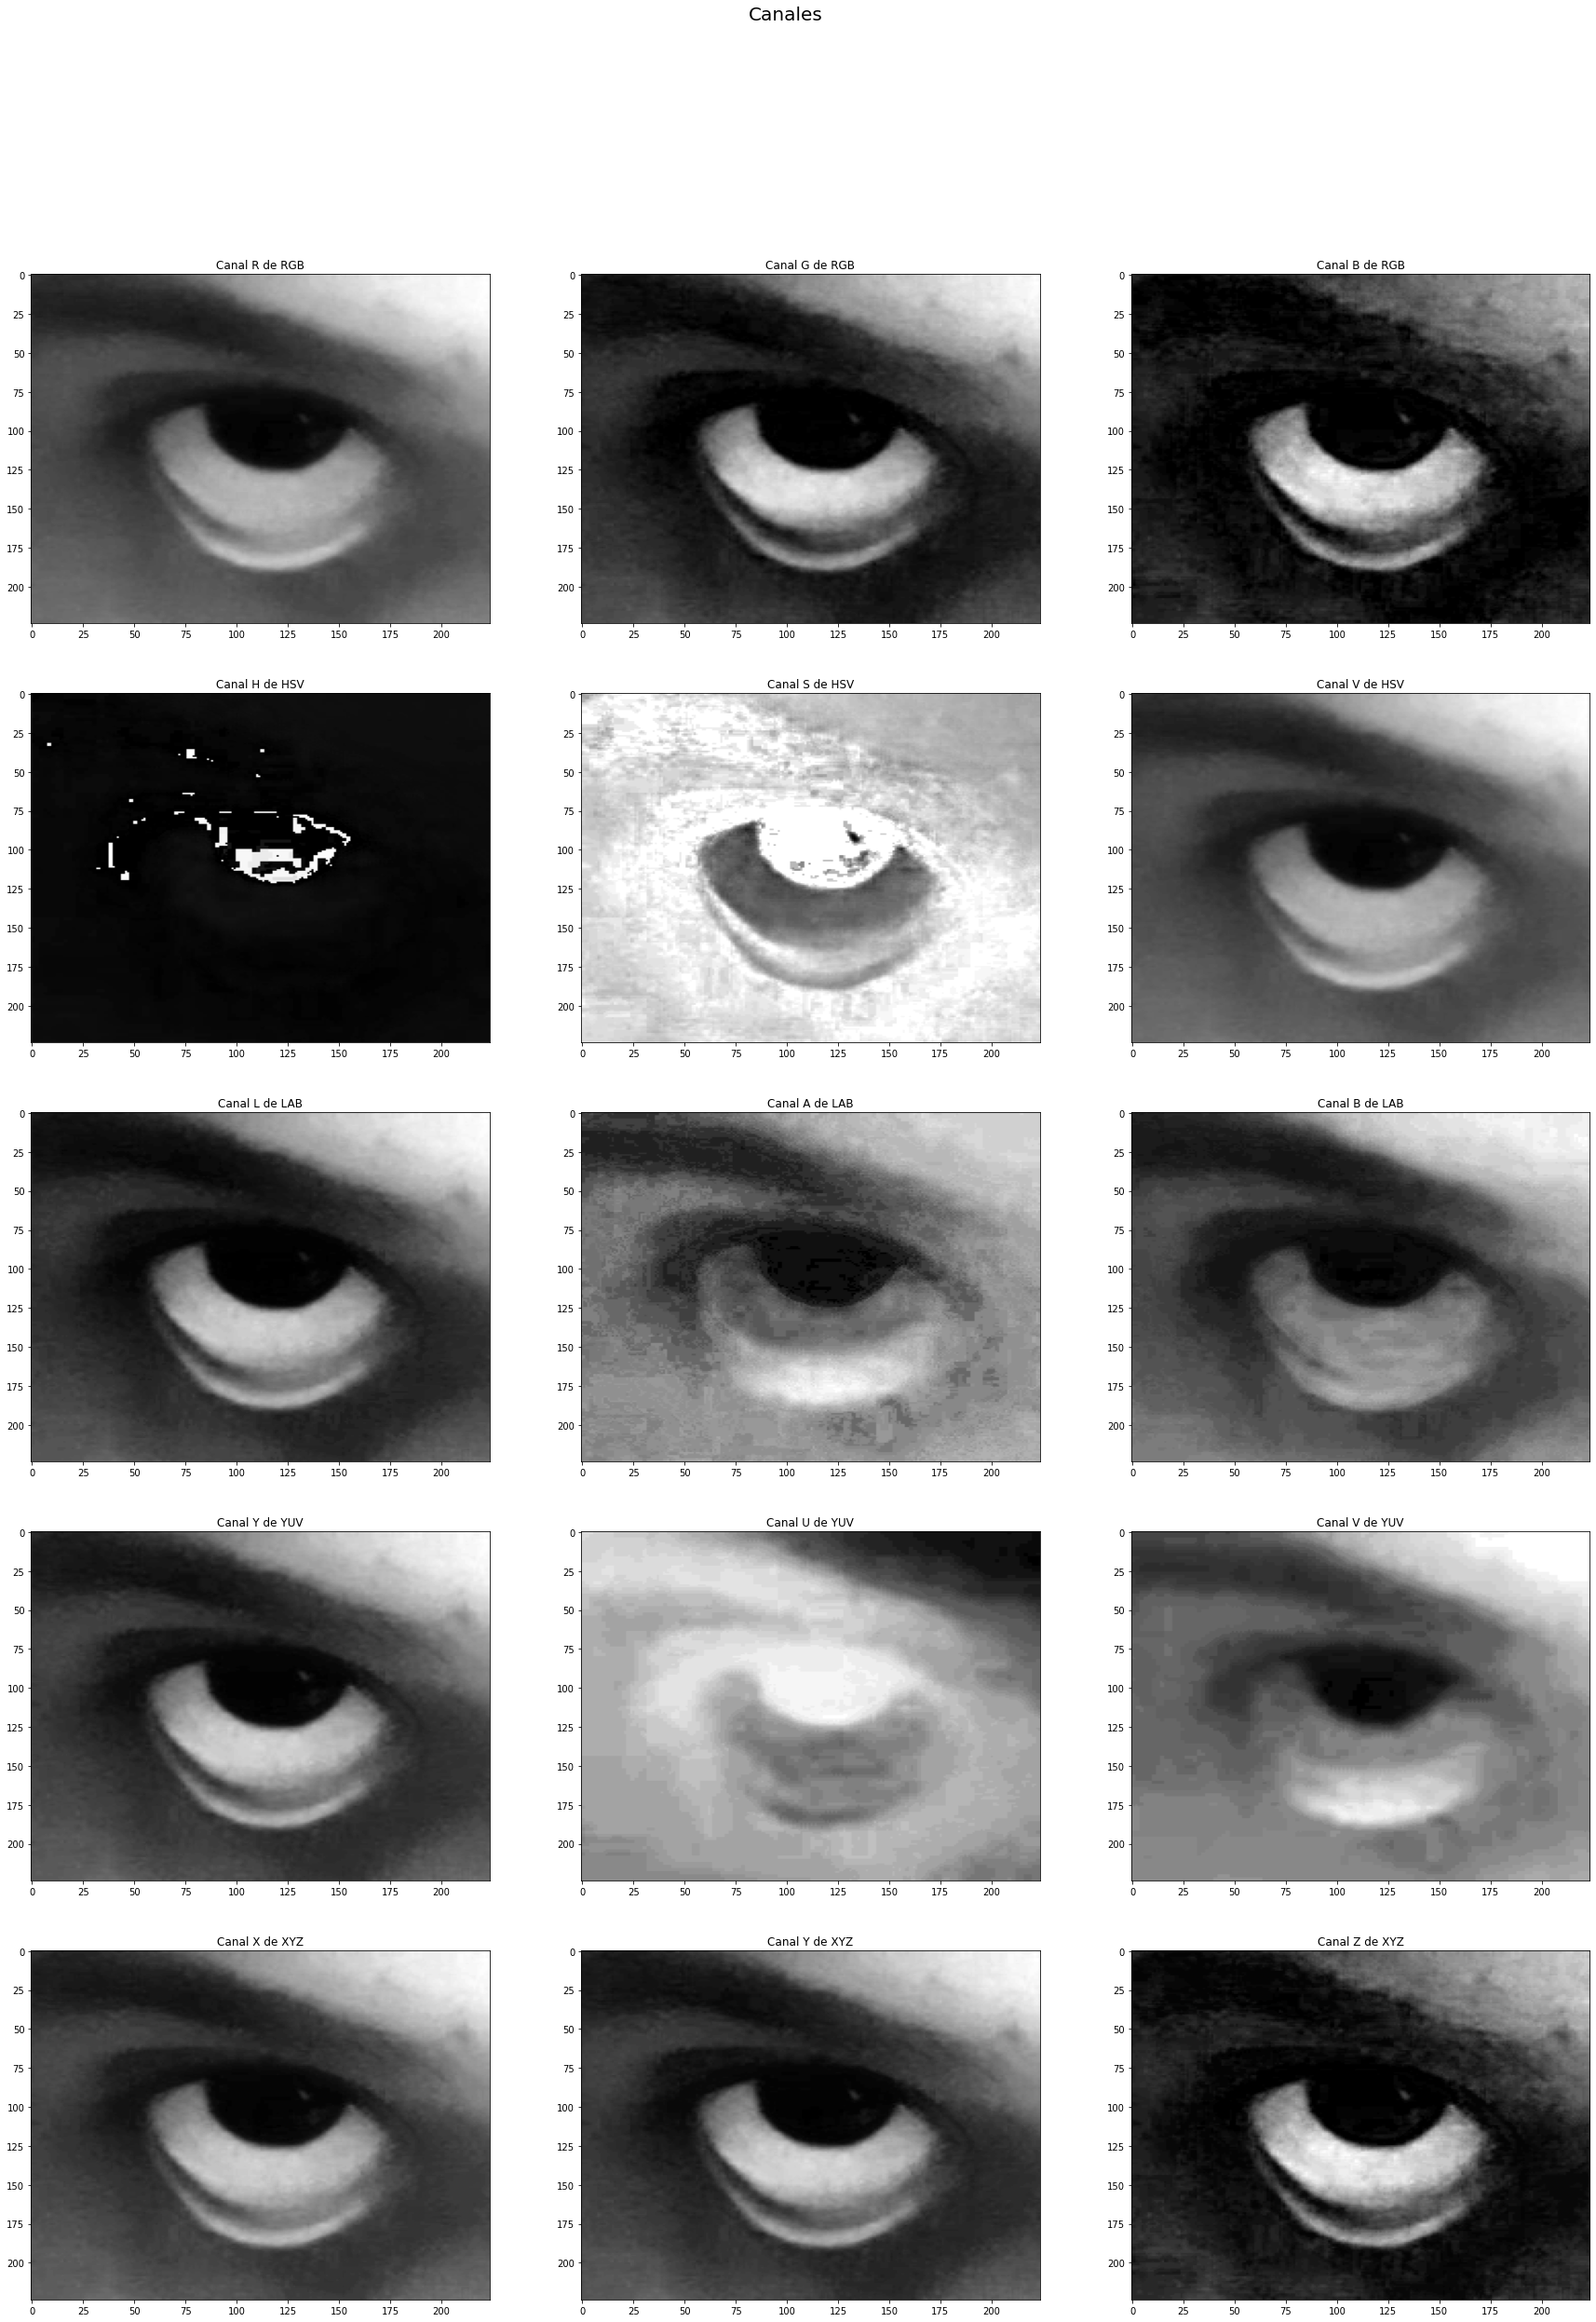

In [5]:
img = cv2.imread("data/img_2_0.jpg", cv2.IMREAD_COLOR)
#Convertir a RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]

#Convertir a HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_H = img_hsv[:,:,0]
img_S = img_hsv[:,:,1]
img_V = img_hsv[:,:,2]

#Convertir a LAB
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img_L = img_lab[:,:,0]
img_A = img_lab[:,:,1]
img_B_ = img_lab[:,:,2]

#Convertir a YUV
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
img_Y = img_yuv[:,:,0]
img_U = img_yuv[:,:,1]
img_V_ = img_yuv[:,:,2]

#Convertir a XYZ
img_xyz = cv2.cvtColor(img, cv2.COLOR_BGR2XYZ)
img_X = img_xyz[:,:,0]
img_Y_ = img_xyz[:,:,1]
img_Z = img_xyz[:,:,2]

#Se crea un subplot de 5x3, para mostrar las 6 imágenes y compararlas.
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15)) = plt.subplots(5,3, figsize=(30, 40))
fig.suptitle('Canales', fontsize=20)
ax1.set_title('Canal R de RGB')
ax1.imshow(img_R, cmap = "gray", aspect='auto')
ax2.set_title('Canal G de RGB')
ax2.imshow(img_G, cmap='gray', aspect='auto')
ax3.set_title('Canal B de RGB')
ax3.imshow(img_B, cmap='gray', aspect='auto')
ax4.set_title('Canal H de HSV')
ax4.imshow(img_H, cmap='gray', aspect='auto')
ax5.set_title('Canal S de HSV')
ax5.imshow(img_S, cmap='gray', aspect='auto')
ax6.set_title('Canal V de HSV')
ax6.imshow(img_V, cmap='gray', aspect='auto')
ax7.set_title('Canal L de LAB')
ax7.imshow(img_L, cmap='gray', aspect='auto')
ax8.set_title('Canal A de LAB')
ax8.imshow(img_A, cmap='gray', aspect='auto')
ax9.set_title('Canal B de LAB')
ax9.imshow(img_B_, cmap='gray', aspect='auto')
ax10.set_title('Canal Y de YUV')
ax10.imshow(img_Y, cmap='gray', aspect='auto')
ax11.set_title('Canal U de YUV')
ax11.imshow(img_U, cmap='gray', aspect='auto')
ax12.set_title('Canal V de YUV')
ax12.imshow(img_V_, cmap='gray', aspect='auto')
ax13.set_title('Canal X de XYZ')
ax13.imshow(img_X, cmap='gray', aspect='auto')
ax14.set_title('Canal Y de XYZ')
ax14.imshow(img_Y_, cmap='gray', aspect='auto')
ax15.set_title('Canal Z de XYZ')
ax15.imshow(img_Z, cmap='gray', aspect='auto')

## Modificación de brillo y contraste

In [11]:
import cv2
import numpy as np


def apply_brightness_contrast(input_img, brightness = 0, contrast = 0):
    
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow
        
        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img.copy()
    
    if contrast != 0:
        f = 131*(contrast + 127)/(127*(131-contrast))
        alpha_c = f
        gamma_c = 127*(1-f)
        
        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

    return buf

In [16]:
def comparative(img):   
    font = cv2.FONT_HERSHEY_SIMPLEX
    fcolor = (0,0,0)

    blist = [0, -20, 20,   30,  0, 20] 
    clist = [0,    0,   0, -15, 20, 20]


    out = np.zeros((s*2, s*3, 3), dtype = np.uint8)

    for i, b in enumerate(blist):
        c = clist[i]
        #print('b, c:  ', b,', ',c)
        row = s*int(i/3)
        col = s*(i%3)

        #print('row, col:   ', row, ', ', col)

        out[row:row+s, col:col+s] = apply_brightness_contrast(img, b, c)
        msg = 'b %d' % b
        cv2.putText(out,msg,(col,row+s-22), font, .7, fcolor,1,cv2.LINE_AA)
        msg = 'c %d' % c
        cv2.putText(out,msg,(col,row+s-4), font, .7, fcolor,1,cv2.LINE_AA)
    return out


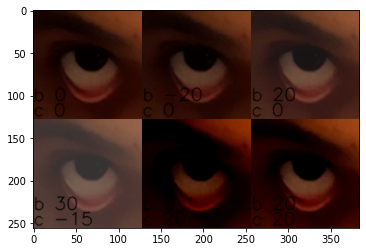

In [17]:
img = cv2.cvtColor(cv2.imread("data/img_2_0.jpg"),cv2.COLOR_BGR2RGB)  
s = 128
img = cv2.resize(img, (s,s), 0, 0, cv2.INTER_AREA)

out = comparative(img)

plt.imshow(out, cmap = 'gray')

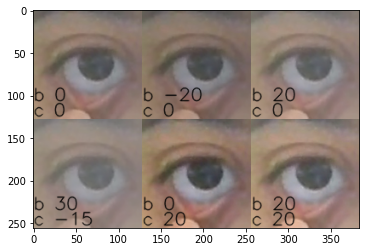

In [18]:
img = cv2.cvtColor(cv2.imread("data/img_1_10.jpg"),cv2.COLOR_BGR2RGB)  
s = 128
img = cv2.resize(img, (s,s), 0, 0, cv2.INTER_AREA)
out = comparative(img)
plt.imshow(out, cmap = 'gray')

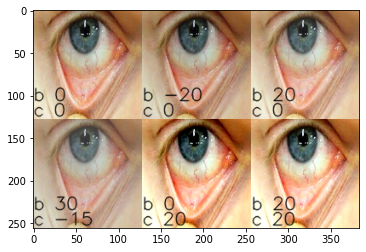

In [19]:
img = cv2.cvtColor(cv2.imread("data/img_1_0.jpg"),cv2.COLOR_BGR2RGB)  
s = 128
img = cv2.resize(img, (s,s), 0, 0, cv2.INTER_AREA)
out = comparative(img)
plt.imshow(out, cmap = 'gray')

## Máscara

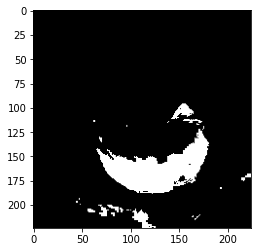

In [20]:
img = cv2.imread("data/img_2_20.jpg")

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

hsv_inf = (0,60,60)
hsv_a = (6,255,255)

mask1 = cv2.inRange(hsv, hsv_inf, hsv_a)

plt.imshow(mask1, cmap = 'gray')



## Morfología

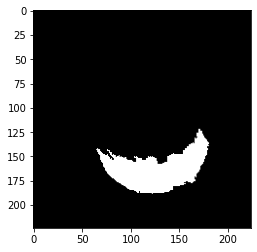

In [222]:

mask_img = mask1.astype(np.bool_)

cleaned = morph.remove_small_objects(mask_img, min_size=210)
cleaned = morph.remove_small_holes(cleaned)

plt.imshow(cleaned, cmap = 'gray')


## Extracción de carácteristicas

In [28]:
#Importar librerías
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew

def img_read(filename, mode = 'color'):
    if(mode == 'color'):   
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2RGB)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
        return None

In [29]:
#Definir la función para obtener características del espacio LAB y HSV
def get_hsv_features(im, mask, features):
    #La imagen de entrada debe estar en el espacio RGB
    #Extraer el tamaño de la imagen de entrada y convertirla a LAB y HSV
    shape = np.shape(im)
    im_hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
    
    h = im_hsv[:,:,0]
    s = im_hsv[:,:,1]
    v = im_hsv[:,:,2]
    #Definir listas vacías de canales h,s,v
    h_1 = []
    s_1 = []
    v_1 = []
    
    #Recorrer cada posición i,j de la matriz de la imagen de entrada
    for i in range(shape[0]):
        for j in range(shape[1]):
            #Condicional, si la máscara en la posición i,j es un array verdadero añadir
            #a cada canal del nuevo HSV el píxel en esta posición
            if((mask[i][j] == np.array([True, True, True])).all() ):
                h_1.append(h[i][j])
                s_1.append(s[i][j])
                v_1.append(v[i][j])
                
    #Utilizar features para guardar los valores de media, desviación estándar, kurtosis y sesgo
    #de cada uno de los canales h_1, s_1, v_1
    features['h_mean'] = np.mean(h_1)
    features['h_std'] = np.std(h_1)
    features['h_kurtosis'] = kurtosis(h_1)
    features['h_skew'] = skew(h_1)
    features['s_mean'] = np.mean(s_1)
    features['s_std'] = np.std(s_1)
    features['s_kurtosis'] = kurtosis(s_1)
    features['s_skew'] = skew(s_1)
    features['v_mean'] = np.mean(v_1)
    features['v_std'] = np.std(v_1)
    features['v_kurtosis'] = kurtosis(v_1)
    features['v_skew'] = skew(v_1)
    return features

#Función de extracción de características de los canales rgb, lab-hsv
def features_pipeline(img, mask):
    features = {}
    features = get_hsv_features(img,mask,features)
    return features


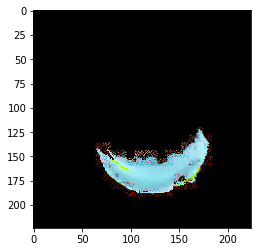

In [32]:
#Leer imagen de entrada, una máscara de entrada binarizada
img = cv2.cvtColor(cv2.imread("data/img_2_20.jpg"), cv2.COLOR_BGR2RGB)
 #cv2.cvtColor(cv2.imread("data/img_1_10.jpg"),cv2.COLOR_BGR2RGB) 
mask = cv2.cvtColor(cv2.imread("mask.jpg"), cv2.COLOR_BGR2RGB)
#mask = mask > 128

#Multiplicar imagen de entrada por la máscara
img = img*(mask)

#Invocar el diccionario de características
features = features_pipeline(img, mask)
plt.imshow(img)

In [33]:
features

{'h_mean': 5.974169741697417,
 'h_std': 2.073216290377324,
 'h_kurtosis': -0.6642113518173263,
 'h_skew': 0.37734857194110294,
 's_mean': 213.46125461254613,
 's_std': 38.339969950991375,
 's_kurtosis': -1.4963914399707545,
 's_skew': -0.3862939023785989,
 'v_mean': 74.30258302583026,
 'v_std': 27.074394446716454,
 'v_kurtosis': -1.436952882325451,
 'v_skew': 0.5830773846912088}

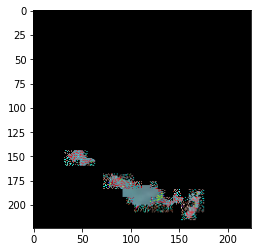

In [35]:
#Leer imagen de entrada, una máscara de entrada binarizada
img = cv2.cvtColor(cv2.imread("data/img_1_10.jpg"), cv2.COLOR_BGR2RGB)
mask = cv2.cvtColor(cv2.imread("mask_1.jpg"), cv2.COLOR_BGR2RGB)
#mask = mask > 128

#Multiplicar imagen de entrada por la máscara
img = img*(mask)

#Invocar el diccionario de características
features = features_pipeline(img, mask)
plt.imshow(img)

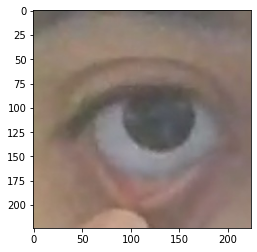

In [36]:
img = cv2.cvtColor(cv2.imread("data/img_1_10.jpg"), cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [37]:
features

{'h_mean': 12.590361445783133,
 'h_std': 33.35414311478509,
 'h_kurtosis': 19.750445516929503,
 'h_skew': 4.6483640825579045,
 's_mean': 61.967871485943775,
 's_std': 10.932017559409017,
 's_kurtosis': 1.0897328862090756,
 's_skew': 0.7652840821943915,
 'v_mean': 142.94779116465864,
 'v_std': 10.287888400030797,
 'v_kurtosis': -0.7138469939599683,
 'v_skew': 0.18502106806831495}

## Proceso de extracción de características para todo el dataset

In [169]:
def get_all_hsv_features(im, mask):
    #La imagen de entrada debe estar en el espacio RGB
    #Extraer el tamaño de la imagen de entrada y convertirla a LAB y HSV
    shape = np.shape(im)
    im_hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
    
    h = im_hsv[:,:,0]
    s = im_hsv[:,:,1]
    v = im_hsv[:,:,2]
    #Definir listas vacías de canales h,s,v
    h_1 = []
    s_1 = []
    v_1 = []
    
    #Recorrer cada posición i,j de la matriz de la imagen de entrada
    for i in range(shape[0]):
        for j in range(shape[1]):
            #Condicional, si la máscara en la posición i,j es un array verdadero añadir
            #a cada canal del nuevo HSV el píxel en esta posición
            if((mask[i][j] == np.array([True, True, True])).all() ):
                h_1.append(h[i][j])
                s_1.append(s[i][j])
                v_1.append(v[i][j])
                
    #Utilizar features para guardar los valores de media, desviación estándar, kurtosis y sesgo
    #de cada uno de los canales h_1, s_1, v_1
    features = [np.mean(h_1),
         np.std(h_1),
        kurtosis(h_1),
        skew(h_1),
        np.mean(s_1),
        np.std(s_1),
        kurtosis(s_1),
        skew(s_1),
        np.mean(v_1),
        np.std(v_1),
        kurtosis(v_1),
        skew(v_1),]
    
    return features

In [255]:
import cv2
import os

def extract_features_from_images(folder):
    features_list = []
    y_list = []
    for filename in os.listdir(folder):
        
        img = cv2.imread(os.path.join(folder,filename))
        #img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV) 
        #corrección de brillo y contraste
        #brightness = 20 
        #contrast = 20
        #correction = apply_brightness_contrast(img, brightness, contrast)
        
        #máscara
        hsv_inf = (0,60,60)
        hsv_a = (6,255,255)
        
        #print("imagen ", img)
        #print("filename ", filename)
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        mask1 = cv2.inRange(hsv, hsv_inf, hsv_a)

            
        #morfología
        mask_img = mask1.astype(np.bool_)
        cleaned = morph.remove_small_objects(mask_img, min_size=210)
        cleaned = morph.remove_small_holes(cleaned)
        #mask = cleaned * 255
        cv2.imwrite(f"masks/mask_{filename}", cleaned * 255)
        mask = cv2.cvtColor(cv2.imread(f"masks/mask_{filename}"),cv2.COLOR_BGR2RGB)
        
        #Características
        features = get_all_hsv_features(img, mask)
        
        if not np.isnan(features).any():  #si se encuentra una imagen con features Nan se ignora
            
            features_list.append(features)
        
            #labels (si la imagen empieza con "img_1" tiene anemia, si empieza "img_2" no tiene anemia

            has_anemia = filename.split("_")[1]

            if has_anemia == '1':
                y_list.append(0)
            else:
                y_list.append(1)

    return features_list, y_list

In [256]:
%%time
x, y = extract_features_from_images("data")

/home/elkin/Desktop/cursos/Vision/venv_vision/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/elkin/Desktop/cursos/Vision/venv_vision/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/elkin/Desktop/cursos/Vision/venv_vision/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/elkin/Desktop/cursos/Vision/venv_vision/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/elkin/Desktop/cursos/Vision/venv_vision/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  

CPU times: user 43.1 s, sys: 53.3 ms, total: 43.1 s
Wall time: 43.5 s


In [248]:
print(x)

[[114.22677595628416, 1.7941751500146514, -0.6053916862959956, -0.10919164607818489, 211.40983606557376, 35.5528746768434, -0.8517848048964063, -0.575981484144108, 71.77868852459017, 25.986391655739677, -1.1526268443739083, 0.6720988472323828], [114.74909090909091, 2.130033949987458, -1.2876346659171474, -0.1811728240842592, 216.61818181818182, 37.432844551805964, -1.0503579723947922, -0.6536173927414001, 65.3490909090909, 21.28272771929279, -1.143934270407574, 0.6759560407763127], [114.9346590909091, 2.763138634063394, -0.03343692167379064, 0.08159367860080319, 202.4090909090909, 43.91259044025476, -1.515404523208912, -0.20768687332431257, 63.92329545454545, 22.282976646554392, -0.7377866849371153, 0.09439189269488131], [112.63938618925832, 0.7261175401131024, 8.026460592756951, -2.255561438988416, 173.61125319693096, 34.23257712006445, -0.43191151684946494, 0.14866600053796025, 141.74936061381075, 46.35880958279555, -0.9632847140348444, 0.1279722242025271], [112.36335403726709, 0.959

In [258]:
print(y)

[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]


In [257]:
df = pd.DataFrame(x)
df.columns = ["h_mean", "h_std", "h_kurtosis", "h_skew", 
           "s_mean", "s_std", "s_kurtosis", "s_skew", 
           "v_mean", "v_std", "v_kurtosis", "v_skew"]
df

h_mean     h_std  h_kurtosis    h_skew      s_mean      s_std  \
0    114.226776  1.794175   -0.605392 -0.109192  211.409836  35.552875   
1    114.749091  2.130034   -1.287635 -0.181173  216.618182  37.432845   
2    114.934659  2.763139   -0.033437  0.081594  202.409091  43.912590   
3    114.241270  2.341932   -0.522320  0.220233   87.692063  29.620088   
4    113.443325  2.351898   -0.455460  0.041594   91.707809  28.443948   
..          ...       ...         ...       ...         ...        ...   
156  113.894602  2.094600   13.010923  2.177207  204.591260  42.111311   
157  115.702668  3.916930   -0.918723  0.640855  132.902160  39.036025   
158  114.432353  1.966966   -1.114718 -0.065968  211.138235  35.496334   
159  115.041616  3.148426   -0.306491  0.895876  169.686659  37.731801   
160  115.725389  4.007729   -0.777357  0.535937  148.134715  34.246099   

     s_kurtosis    s_skew     v_mean      v_std  v_kurtosis    v_skew  
0     -0.851785 -0.575981  71.778689  25.986392   -1.152627  0.672099  
1     -1.050358 -0.653617  65.349091  21.282728   -1.143934  0.675956  
2     -1.515405 -0.207687  63.923295  22.282977   -0.737787  0.094392  
3     -1.187022 -0.033527  92.000000  39.517085   -0.319203  0.659015  
4     -0.420648  0.382497  82.594458  37.986068    0.313342  1.117508  
..          ...       ...        ...        ...         ...       ...  
156   -1.015309 -0.609644  66.915167  22.224387    0.041581  0.635345  
157   -0.610024 -0.290770  74.829733  27.041762   -0.517517  0.533102  
158   -0.629639 -0.739817  69.450000  23.558572   -0.745007  0.943696  
159   -0.310521  0.098285  73.375765  29.428162    0.219177  0.851204  
160    0.140468 -0.065796  83.806995  32.988737   -0.762462  0.361702  

[161 rows x 12 columns]

## Filtro Gaussiano

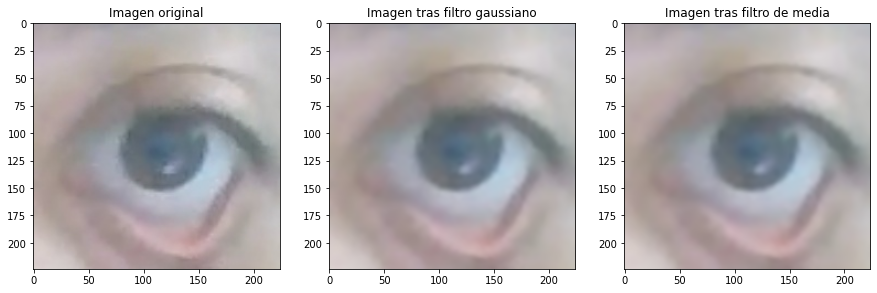

In [10]:
#Importar librerías
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt

#Leer imagen de entrada
img = cv2.cvtColor(cv2.imread("data/img_1_161.jpg"),cv2.COLOR_BGR2RGB)
#Definir tamaño del kernel
k_size = 5

#Aplicar un filtro Gaussiano con OpenCV a la imagen de entrada
res= cv2.GaussianBlur(img, (k_size,k_size), 2)

#Aplicar un filtro de media a la imagen de entrada
res2 = cv2.blur(img, (k_size,k_size))

#Generar un subplot 1x3 que muestra imagen original y filtradas
fig, arreglo_plots = plt.subplots(1,3, figsize=(15, 15))
arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray")

arreglo_plots[1].set_title('Imagen tras filtro gaussiano')
arreglo_plots[1].imshow(res, cmap="gray")

arreglo_plots[2].set_title('Imagen tras filtro de media')
arreglo_plots[2].imshow(res2, cmap="gray")

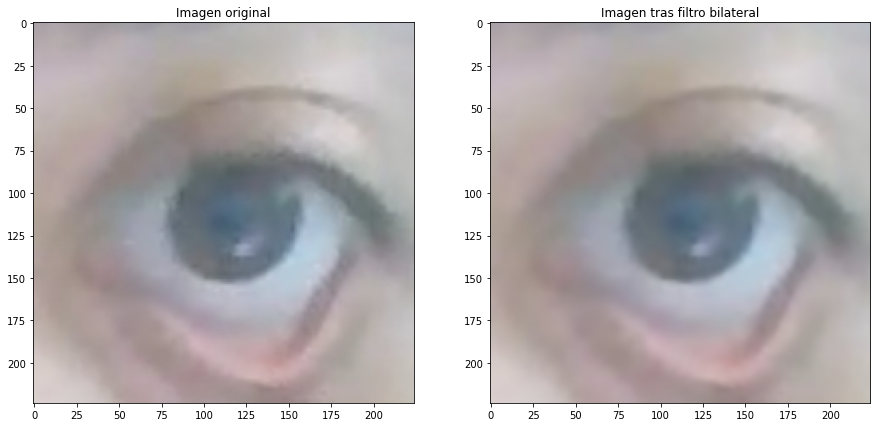

In [13]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

#Leer imagen de entrada
img = cv2.cvtColor(cv2.imread("data/img_1_161.jpg"),cv2.COLOR_BGR2RGB)

#Tamaño del kernel
k_size = 5

#Aplicar la función filtro bilateral de OpenCv y dar tipo de dato uint8
res = cv2.bilateralFilter(img,k_size,75, 75)
res = res.astype(np.uint8)

#Generar subplot 1x2 para mostrar imagen original e imagen tras filtro bilateral
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray", vmin=0, vmax=255)

arreglo_plots[1].set_title('Imagen tras filtro bilateral')
arreglo_plots[1].imshow(res, cmap="gray", vmin=0, vmax=255)

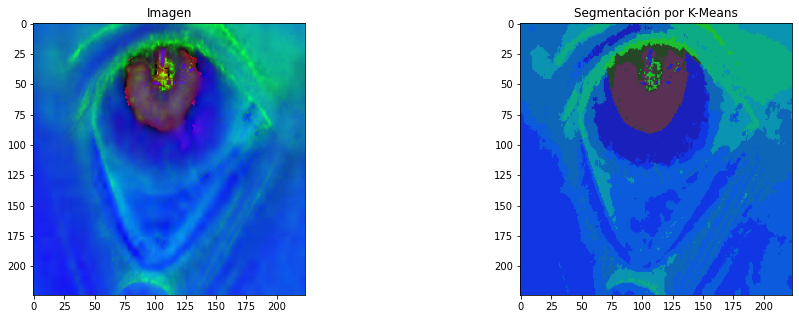

In [65]:
#Importar librerías
import numpy as np
import cv2

#Leer imagen de entrada
img = cv2.cvtColor(cv2.imread("data/img_1_0.jpg"),cv2.COLOR_BGR2HSV)

#Reorganizar la imagen de entrada y darle unidades flotantes
Z = img.reshape((-1,3))
Z = np.float32(Z)

# definir criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 9
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

#Volver a tipo de dato uint8 y mostrar la imagen
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

#Generar un subplot 1x2 y mostrar imagen junto a segmentación por K-means
fig, ax = plt.subplots(1,2, figsize=(16, 5))

ax[0].set_title('Imagen')
ax[0].imshow(img, cmap='gray')
ax[1].set_title('Segmentación por K-Means')
ax[1].imshow(res2, cmap='gray')


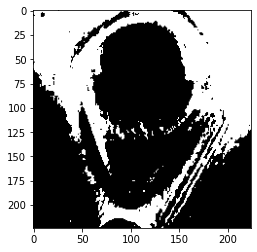

In [76]:
#hsv_inf = (0,60,60)
#hsv_a = (8,255,255)
#hsv_inf = (150,110,70)
#hsv_a = (160,140,255)
hsv_inf = (0,100,60)
hsv_a = (100,255,255)
## mask of green (36,0,0) ~ (70, 255,255)
mask1 = cv2.inRange(res2, hsv_inf, hsv_a)
#mask1 = cv2.inRange(hsv, (175,50,20),(180,255,255))
#target = cv2.bitwise_and(img,img, mask=mask1)
#target = target /255
plt.imshow(mask1, cmap = 'gray')

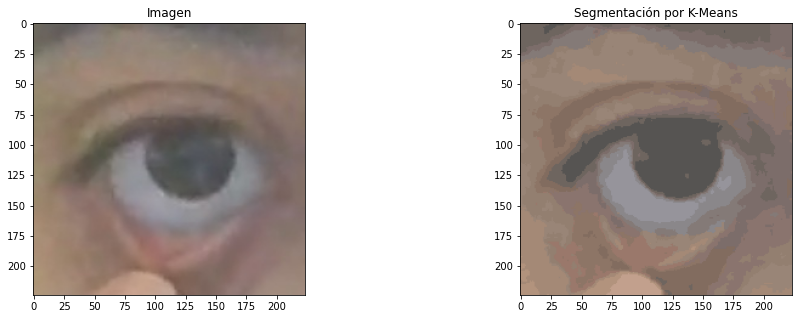

In [38]:
#Importar librerías
import numpy as np
import cv2

#Leer imagen de entrada
img = cv2.cvtColor(cv2.imread("data/img_1_10.jpg"),cv2.COLOR_BGR2RGB)

#Reorganizar la imagen de entrada y darle unidades flotantes
Z = img.reshape((-1,3))
Z = np.float32(Z)

# definir criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 15
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

#Volver a tipo de dato uint8 y mostrar la imagen
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

#Generar un subplot 1x2 y mostrar imagen junto a segmentación por K-means
fig, ax = plt.subplots(1,2, figsize=(16, 5))

ax[0].set_title('Imagen')
ax[0].imshow(img, cmap='gray')
ax[1].set_title('Segmentación por K-Means')
ax[1].imshow(res2, cmap='gray')


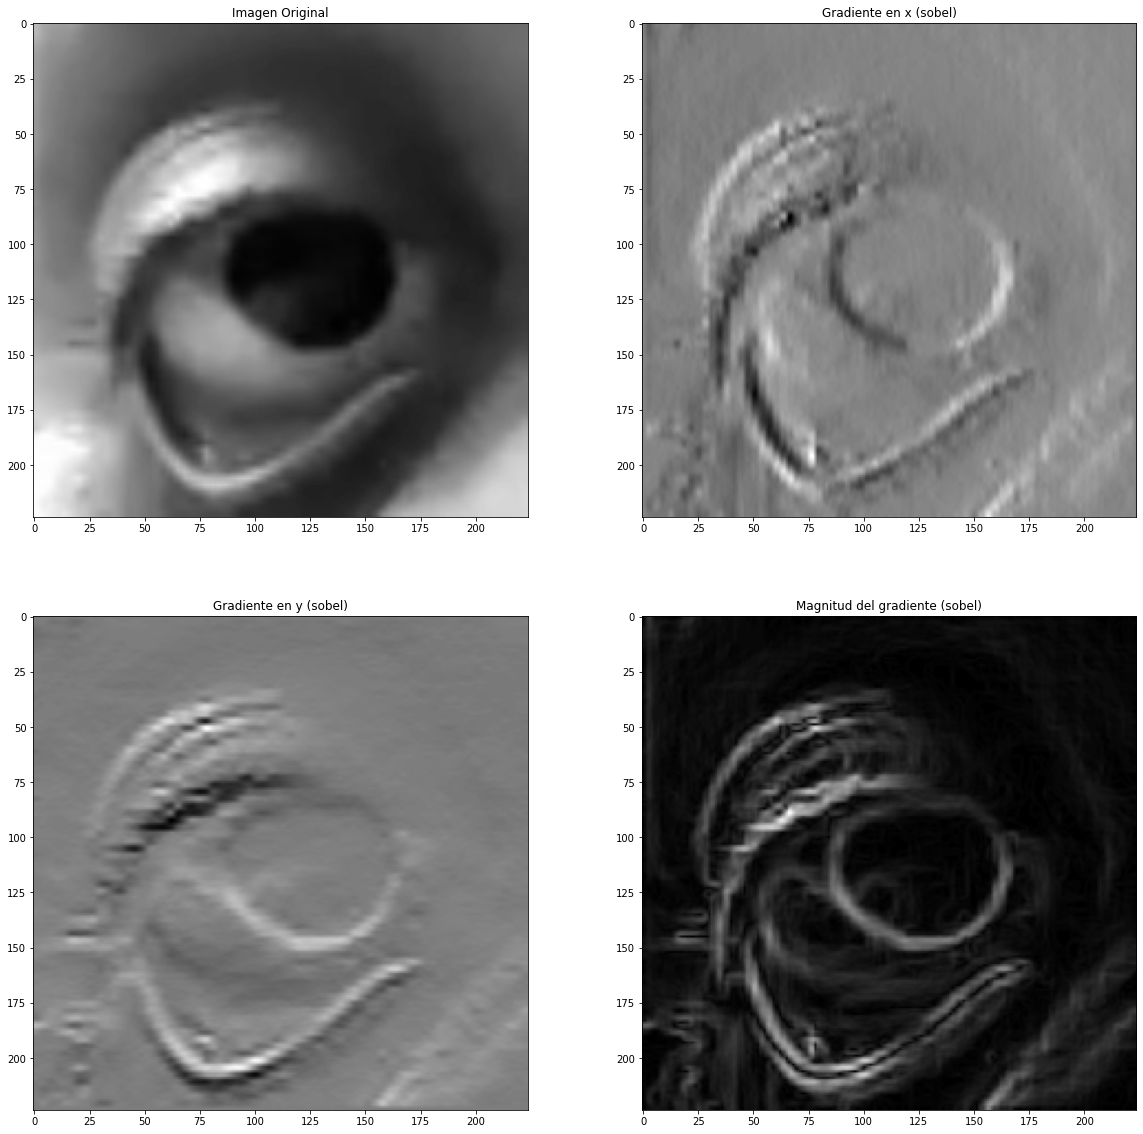

In [43]:
#Importar librerías
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import sobel_v,sobel_h, sobel
import skimage 

def img_scale(img, value_range = [0,255]):
    return (value_range[1] - value_range[0])*(img - np.min(img))/(np.max(img)-np.min(img)) + value_range[0]
#Leer imagen de entrada con tipo de dato float32
img = cv2.cvtColor(cv2.imread("data/img_1_111.jpg"),cv2.COLOR_BGR2GRAY).astype(np.float32)

#La función Sobel recibe: la imagen, el parámetro ddepth, el orden de la derivada que queremos calcular
#en x, el orden de la deirvada que queremos calcular en y,  el tamaño del kernel.
gradiente_x = cv2.Sobel(img, ddepth=-1, dx = 1, dy = 0, ksize = 3)
gradiente_y = cv2.Sobel(img, ddepth=-1, dx = 0, dy = 1, ksize = 3)

#Calcula la magnitud del sobel, por definición
magnitud_sobel = np.sqrt(np.power(gradiente_x,2)+np.power(gradiente_y,2))

#Realizar el escalamiento de la imagen
magnitud_sobel = img_scale(magnitud_sobel)

#Generar subplot 2x2 para mostrar la imagen original, sus gradientes x e y & la magnitud
fig, ax = plt.subplots(2,2, figsize=(20, 20))
ax[0,0].set_title('Imagen Original')
ax[0,0].imshow(img, cmap='gray')
ax[0,1].set_title('Gradiente en x (sobel)')
ax[0,1].imshow(gradiente_x, cmap='gray')
ax[1,0].set_title('Gradiente en y (sobel)')
ax[1,0].imshow(gradiente_y, cmap='gray')
ax[1,1].set_title('Magnitud del gradiente (sobel)')
ax[1,1].imshow(magnitud_sobel, cmap='gray')

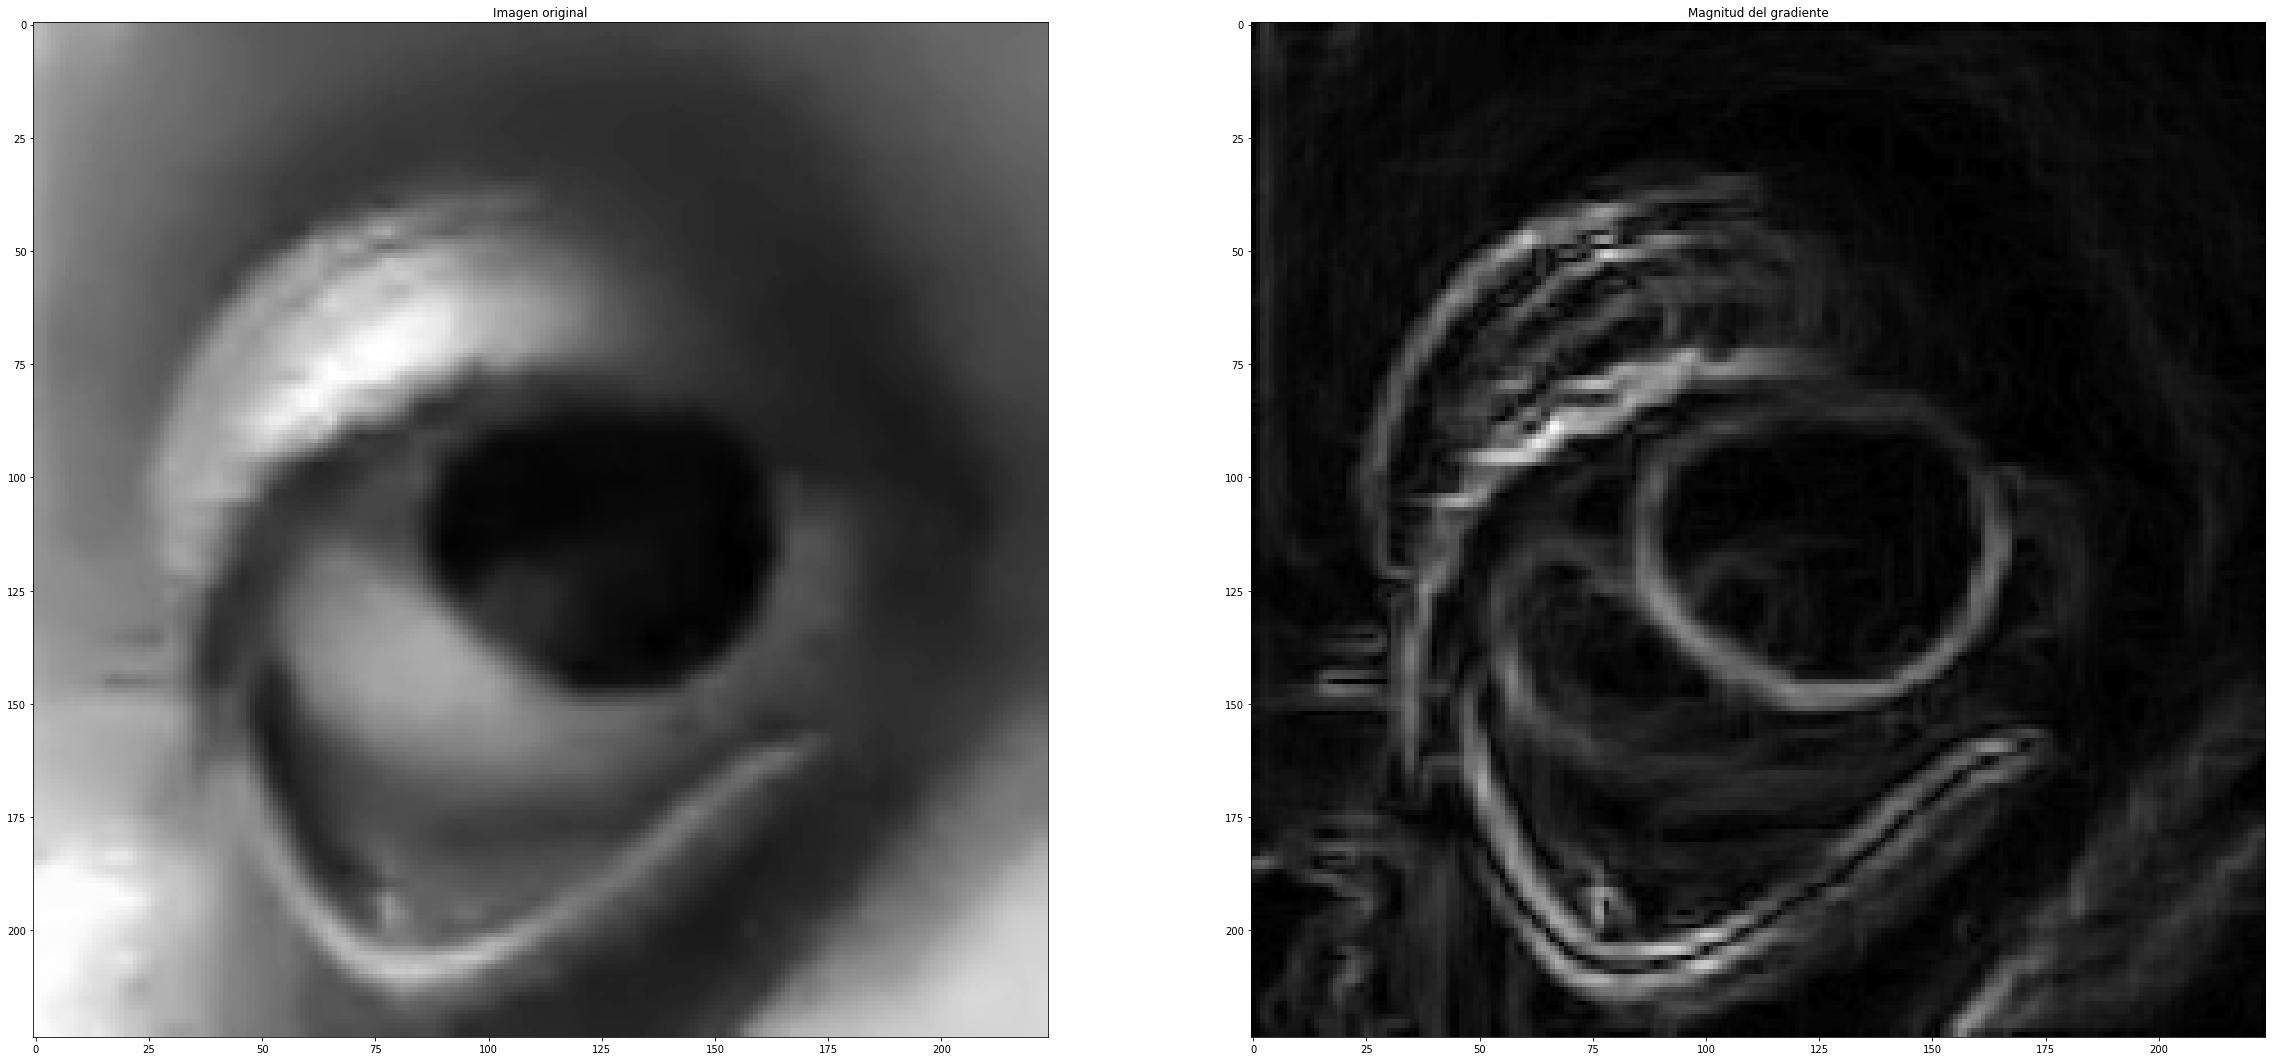

In [44]:
#Importar librerías

import numpy as np
import matplotlib.pyplot as plt
import cv2

#Crear las máscaras del filtro Prewitt
prewitt_x=np.array([[-1,0,1],
                   [-1,0,1],
                   [-1,0,1]],dtype=int)


prewitt_y=np.array([[-1,-1,-1],
                   [0,0,0],
                   [1,1,1]],dtype=int)


#Leer la imagen de entrada y convolucionarla con los dos filtros Prewitt
img = cv2.cvtColor(cv2.imread("data/img_1_111.jpg"),cv2.COLOR_BGR2GRAY).astype(np.float32)
imgc1 = cv2.filter2D(img, ddepth=-1, kernel=prewitt_x)
imgc2 = cv2.filter2D(img, ddepth=-1, kernel= prewitt_y)

#Calcular la magnitud 
magnitud_prewitt = np.sqrt(np.power(imgc1,2)+np.power(imgc2,2))

#Escalar los datos
magnitud_prewitt = img_scale(magnitud_prewitt)

#Generar un subplot 1x2 para mostrar imagen original y la magnitud del gradiente Prewitt
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(40, 40))
ax1.set_title('Imagen original')
ax1.imshow(img, cmap='gray')
ax2.set_title('Magnitud del gradiente')
ax2.imshow((magnitud_prewitt), cmap='gray')

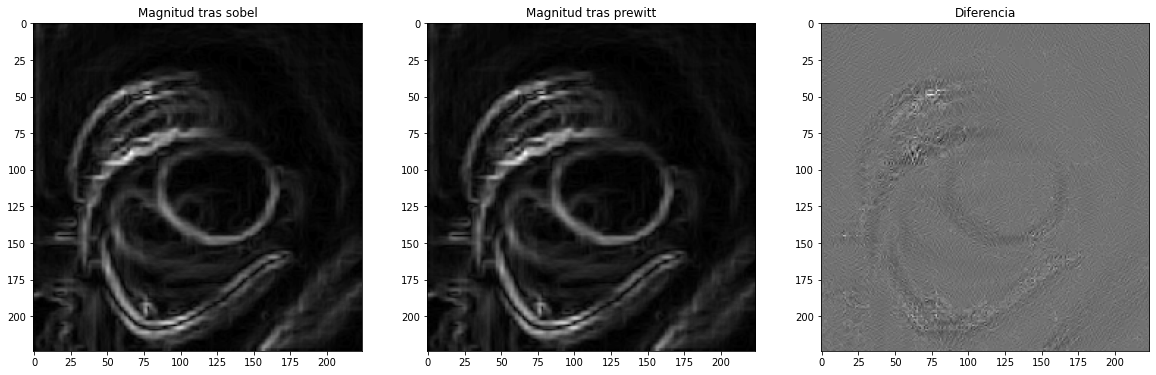

In [45]:
#Restar las magnitudes de los filtros Sobel y Prewitt 
diferencia = magnitud_sobel-magnitud_prewitt

#Generar subplot 1x2 para mostrar las magnitudes y su diferencia
fig, ax = plt.subplots(1,3, figsize=(20, 30))
ax[0].set_title('Magnitud tras sobel')
ax[0].imshow(magnitud_sobel, cmap='gray')
ax[1].set_title('Magnitud tras prewitt')
ax[1].imshow(magnitud_prewitt, cmap='gray')
ax[2].set_title('Diferencia')
ax[2].imshow(diferencia, cmap='gray')

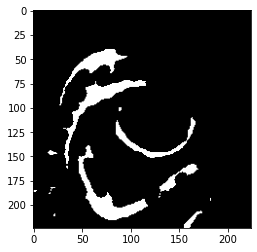

In [93]:
import skimage.morphology as morph

def img_scale(img, value_range = [0,255]):
    return (value_range[1] - value_range[0])*(img - np.min(img))/(np.max(img)-np.min(img)) + value_range[0]
#Leer imagen de entrada con tipo de dato float32
img = cv2.cvtColor(cv2.imread("data/img_1_111.jpg"),cv2.COLOR_BGR2GRAY).astype(np.float32)

#La función Sobel recibe: la imagen, el parámetro ddepth, el orden de la derivada que queremos calcular
#en x, el orden de la deirvada que queremos calcular en y,  el tamaño del kernel.
gradiente_x = cv2.Sobel(img, ddepth=-1, dx = 1, dy = 0, ksize = 3)
gradiente_y = cv2.Sobel(img, ddepth=-1, dx = 0, dy = 1, ksize = 3)

#Calcula la magnitud del sobel, por definición
magnitud_sobel = np.sqrt(np.power(gradiente_x,2)+np.power(gradiente_y,2))

#Realizar el escalamiento de la imagen
magnitud_sobel = img_scale(magnitud_sobel)


img_bin,thresh2 = cv2.threshold(magnitud_sobel,80,200,cv2.THRESH_BINARY)

thresh2 = thresh2/255
#img_bin = morph.remove_small_holes(thresh2.astype(bool), area_threshold = 100)
#img_bin = morph.remove_small_objects(img_bin, min_size = 800)

radius = 5
selem = morph.disk(radius)
cierre = morph.binary_closing(thresh2,selem)
#ax[2].set_title("Cierre")
plt.imshow(cierre, cmap = "gray")


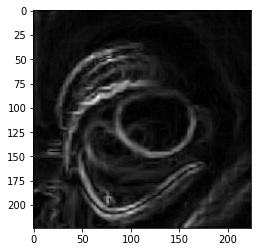

In [56]:
plt.imshow(magnitud_sobel, cmap="gray")
    

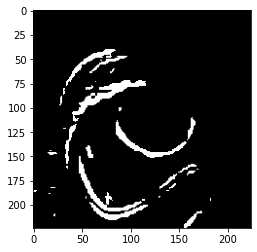

In [73]:
plt.imshow(thresh2, cmap="gray")

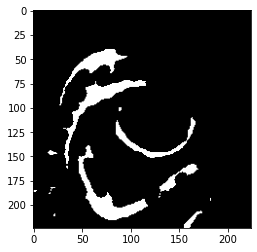

In [95]:
menos_areapeq = morph.remove_small_holes(cierre, area_threshold = 15000)
#ax[3].set_title("Agujeros pequeños")
plt.imshow(menos_areapeq, cmap="gray")

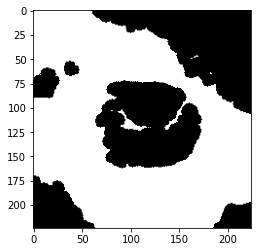

In [128]:
img = cv2.imread("data/img_2_15.jpg")
#img = img / 255
## convert to hsv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

## mask of green (36,0,0) ~ (70, 255,255)
mask1 = cv2.inRange(hsv, (0,50,20), (7,255,255))
#mask1 = cv2.inRange(hsv, (175,50,20),(180,255,255))
#target = cv2.bitwise_and(img,img, mask=mask1)
#target = target /255
plt.imshow(mask1, cmap = 'gray')
#plt.imshow(target, cmap = 'gray')

radius = 5
selem = morph.disk(radius)
cierre = morph.binary_closing(mask1,selem)
#ax[2].set_title("Cierre")
plt.imshow(cierre, cmap = "gray")
